# Data Set- Lhasa, Boston bull, Flat-coated retriever, Walker hound

# 2a

In [15]:
import glob
import os
import xml.etree.ElementTree as ET
from keras_preprocessing import image
from PIL import Image
from pathlib import Path
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [16]:

def dog_ima(dog_breed):
    print(dog_breed)
    path=f'/Users/rohit/Downloads/Images/{dog_breed}/*'
    
    return glob.glob(path)
cropped = "./Cropped/"
dog_images=[]
dog_breeds={0:'n02098413-Lhasa',1:'n02096585-Boston_bull',2:'n02099267-flat-coated_retriever',3:'n02089867-Walker_hound'}
for i in range(4):
    dog_images+=dog_ima(dog_breeds[i])

n02098413-Lhasa
n02096585-Boston_bull
n02099267-flat-coated_retriever
n02089867-Walker_hound


In [17]:
def annot(dog_breed):
    print(dog_breed)
    path=f'/Users/rohit/Downloads/Annotation/{dog_breed}/*'
    return glob.glob(path)
annotations=[]
for i in range(4):
    annotations+=annot(dog_breeds[i])

n02098413-Lhasa
n02096585-Boston_bull
n02099267-flat-coated_retriever
n02089867-Walker_hound


In [20]:
annotations=[os.path.normpath(i) for i in annotations]
annotations=['/'.join(str(i).split('\\')) for i in annotations]
dog_images=[os.path.normpath(i) for i in dog_images]
dog_images=['/'.join(str(i).split('\\')) for i in dog_images]

In [21]:
class crop_resize:
    def __init__(self):
        pass
    def get_bounding_boxes(self,annot):
        xml = annot
        tree = ET.parse(xml)
        root = tree.getroot()
        objects = root.findall('object')
        bbox = []
        for o in objects:
            bndbox = o.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)
            bbox.append((xmin,ymin,xmax,ymax))
        return bbox

    def get_image(self,annot):
        img_path = '/Users/rohit/Downloads/Images/'
        file = annot.split('/')
        img_filename = img_path + file[-2]+'/'+file[-1]+'.jpg'
        return img_filename 
    
    def image_save(self):
        for i in range(len(dog_images)):

            bbox = self.get_bounding_boxes(annotations[i])
            dog = self.get_image(annotations[i])
            im = Image.open(dog)
            for j in range(len(bbox)):
                im2 = im.crop(bbox[j])
                im2 = im2.resize((100,100), Image.ANTIALIAS)
                new_path = dog.replace('/Users/rohit/Downloads/Images/','/Users/rohit/Downloads/Cropped/')
                new_path = new_path.replace('.jpg','-' + str(j) + '.jpg')
                im2=im2.convert('RGB')
                head, tail = os.path.split(new_path)
                Path(head).mkdir(parents=True, exist_ok=True)
                im2.save(new_path)

In [22]:
CR=crop_resize()
CR.image_save()

C:\Users\rohit\AppData\Local\Temp\ipykernel_4660\3331883028.py:33: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im2 = im2.resize((100,100), Image.ANTIALIAS)


In [23]:
len(dog_images)

673

In [24]:
dog_images=glob.glob('/Users/rohit/Downloads/Cropped/*/*')

In [25]:
dog_images=[os.path.normpath(i) for i in dog_images]
dog_images=['/'.join(str(i).split('\\')) for i in dog_images]

In [27]:
def images_select(num_imag):
    def count_of_images(dog_breed,image_list):
        count=0
        for i in image_list:
            if str(i).split('/')[5]== dog_breed:
                count+=1
        if count<num_imag:
            return True
        else:
            return False


    images_hist=[]
    for i,j in dog_breeds.items():
        for k in dog_images:
            print(str(k).split('/')[5],j)            
            if str(k).split('/')[5] ==j:
                print(str(k).split('/')[5],j)
                if count_of_images(j,images_hist):
                    images_hist.append(k)
    return images_hist

In [28]:
images=images_select(2)
len(images)

n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n0

8

In [29]:
images

['/Users/rohit/Downloads/Cropped/n02098413-Lhasa/n02098413_10144-0.jpg',
 '/Users/rohit/Downloads/Cropped/n02098413-Lhasa/n02098413_10285-0.jpg',
 '/Users/rohit/Downloads/Cropped/n02096585-Boston_bull/n02096585_10380-0.jpg',
 '/Users/rohit/Downloads/Cropped/n02096585-Boston_bull/n02096585_10452-0.jpg',
 '/Users/rohit/Downloads/Cropped/n02099267-flat-coated_retriever/n02099267_1018-0.jpg',
 '/Users/rohit/Downloads/Cropped/n02099267-flat-coated_retriever/n02099267_1069-0.jpg',
 '/Users/rohit/Downloads/Cropped/n02089867-Walker_hound/n02089867_1029-0.jpg',
 '/Users/rohit/Downloads/Cropped/n02089867-Walker_hound/n02089867_1048-0.jpg']

# 2b

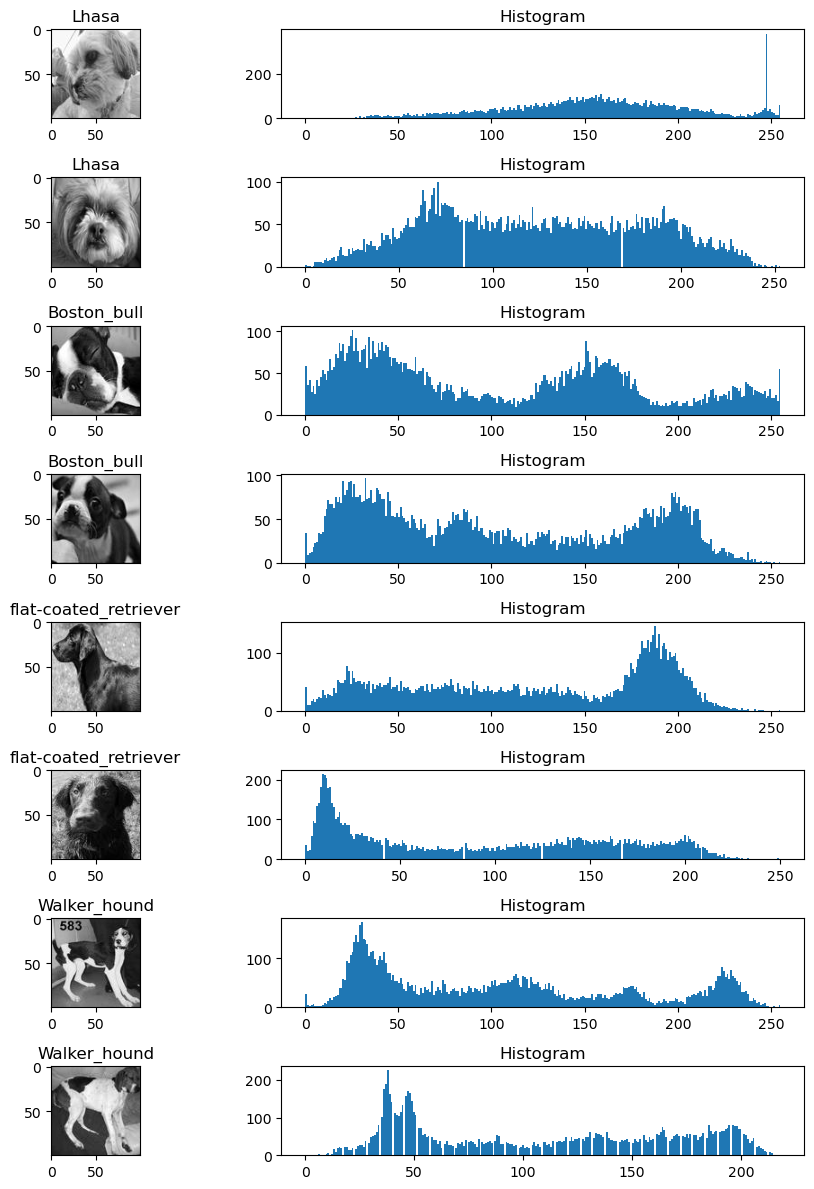

In [30]:
def Histogram_Equalization(image, x,title):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    ax[x,0].imshow(img,cmap='gray')

    ax[x,0].set_title(title)
    ax[x, 1].hist(img.flatten(), bins=256)
    ax[x, 1].set_title('Histogram')
dogs=['Lhasa','Boston_bull', 'flat-coated_retriever','Walker_hound']
    
fig, ax = plt.subplots(8, 2, figsize=(10, 12))
ind=0
title=dogs[ind]
for x,i in enumerate(images):

    if x!=7:
        if x%2==0 and x!=0:
            title=dogs[ind+1]
            ind+=1
    Histogram_Equalization(i,x,title)

plt.tight_layout()
plt.show()


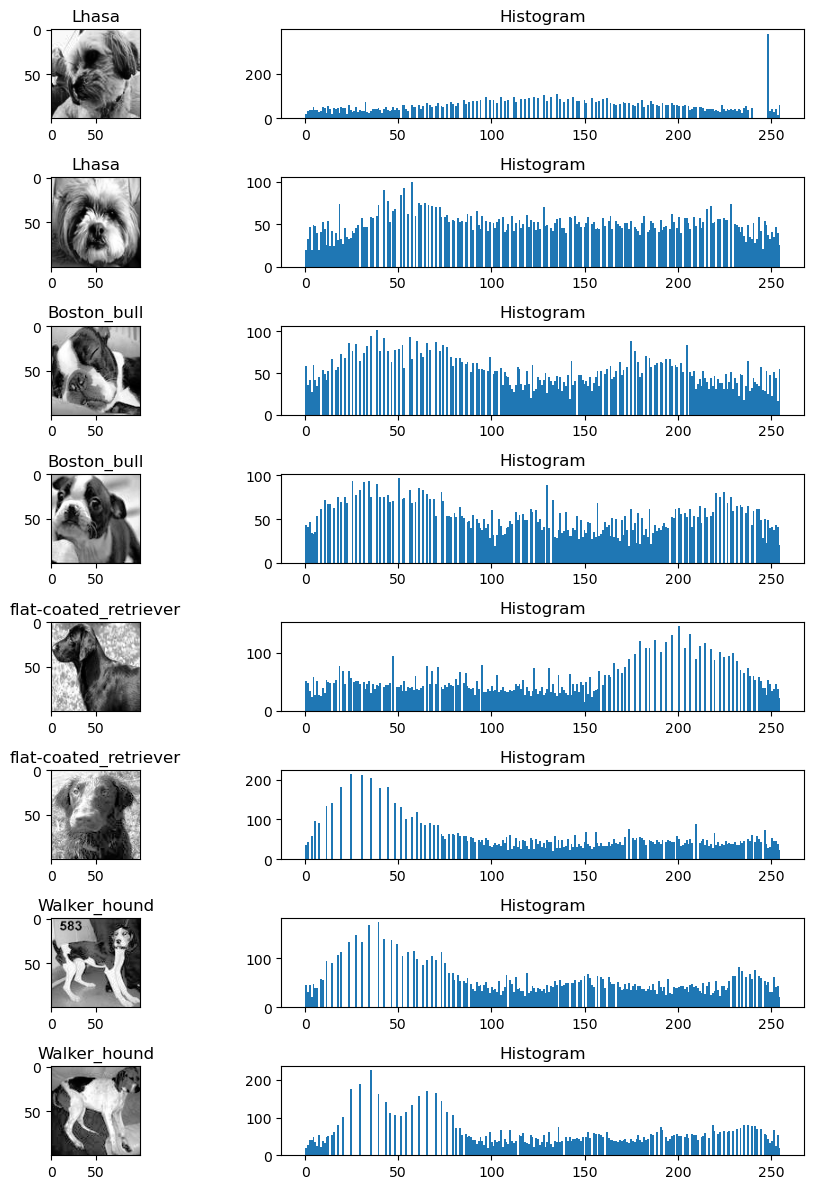

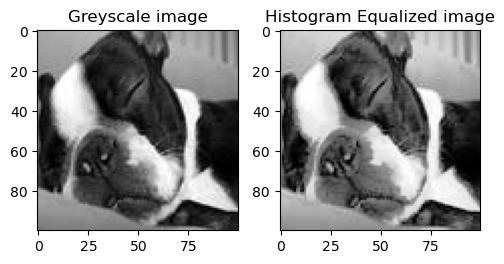

In [31]:
def Intensity_Equalization(image, x,title):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    equ = cv2.equalizeHist(img)
    ax[x,0].imshow(equ,cmap='gray')

    ax[x,0].set_title(title)
    ax[x, 1].hist(equ.flatten(), bins=256)
    ax[x, 1].set_title('Histogram')    
fig, ax = plt.subplots(8, 2, figsize=(10, 12))
ind=0
title=dogs[ind]
for x,i in enumerate(images):

    if x!=7:
        if x%2==0 and x!=0:
            title=dogs[ind+1]
            ind+=1
    Intensity_Equalization(i,x,title)

plt.tight_layout()
plt.show()


def side_side_image(images):
    fig2, (ax1,ax2) = plt.subplots(1, 2, figsize=(5, 6))
    img = cv2.imread(images[2], cv2.IMREAD_GRAYSCALE)
    equ = cv2.equalizeHist(img)
    ax1.imshow(img,cmap='gray')
    ax1.set_title('Greyscale image')
    ax2.imshow(equ,cmap='gray')
    ax2.set_title('Histogram Equalized image')
    plt.tight_layout()
    plt.show()
side_side_image(images)

In [ ]:
### Background is brighter when histogram equalization is performed and increase in exposure###

# 2c

In [32]:
images_3=images_select(1)
len(images_3)

n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n02098413-Lhasa
n02089867-Walker_hound n0

4

In [33]:
images_3

['/Users/rohit/Downloads/Cropped/n02098413-Lhasa/n02098413_10144-0.jpg',
 '/Users/rohit/Downloads/Cropped/n02096585-Boston_bull/n02096585_10380-0.jpg',
 '/Users/rohit/Downloads/Cropped/n02099267-flat-coated_retriever/n02099267_1018-0.jpg',
 '/Users/rohit/Downloads/Cropped/n02089867-Walker_hound/n02089867_1029-0.jpg']

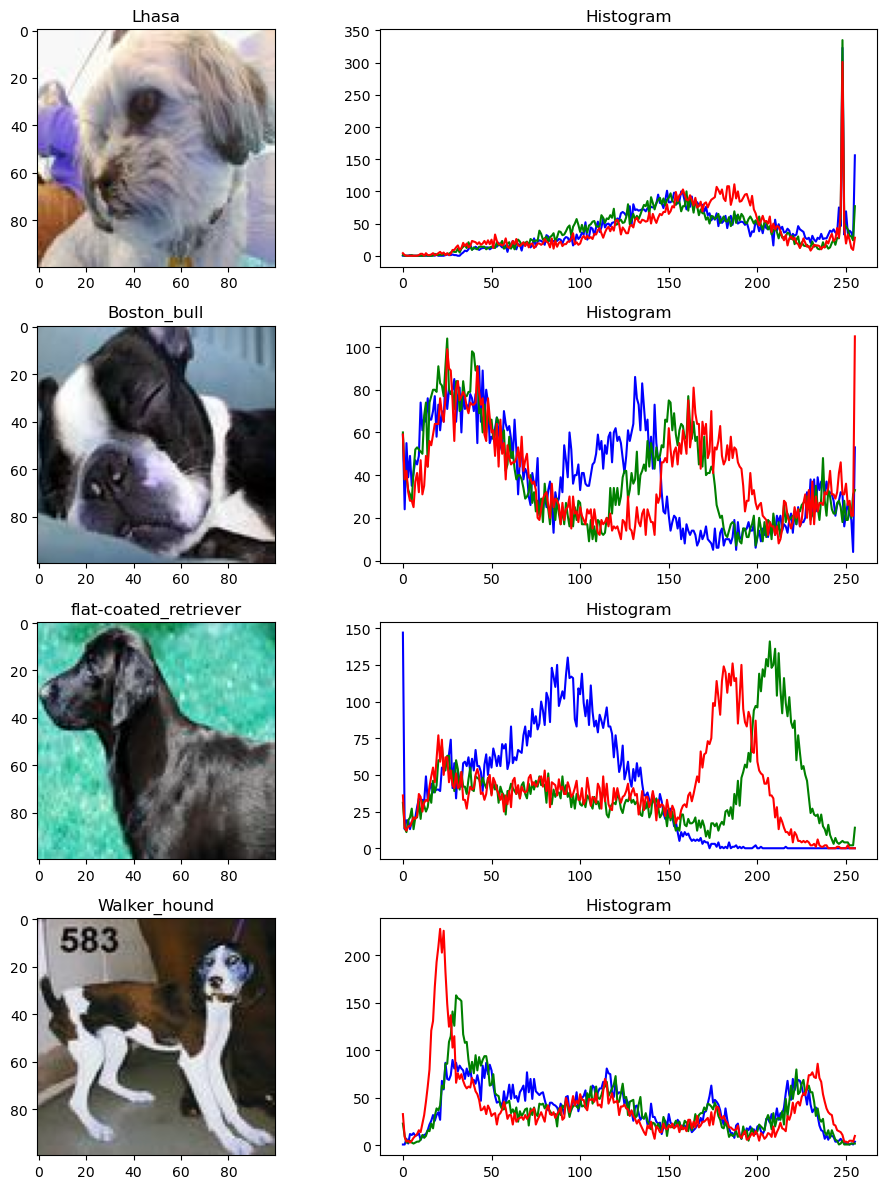

In [34]:
color = ('b','g','r')

def RGB(image, x,title):
    img = cv2.imread(image)
    ax[x,0].imshow(img)
    ax[x,0].set_title(dogs[x])
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        ax[x, 1].plot(histr.flatten(),color=col)
        ax[x, 1].set_title('Histogram')    
fig, ax = plt.subplots(4, 2, figsize=(10, 12))
ind=0
title=dogs[ind]
for x,i in enumerate(images_3):
    RGB(i,x,title)
plt.tight_layout()
plt.show()

# 2d

In [35]:
sameclass=[]
different_class=[]

index=0
for ind,i in enumerate(images):
    if ind ==3:
        break
    
    img = plt.imread(i)
    
    if ind<2:
        print(i)
        sameclass.append(cv2.calcHist([img],[0],None,[256],[0,256]))
    else:
        print(i)
        different_class.append(cv2.calcHist([img],[0],None,[256],[0,256]))
print()
    
print(f'BHATTACHARYA distance between same class--{cv2.compareHist(sameclass[0], sameclass[1],  cv2.HISTCMP_BHATTACHARYYA)}')
print(f'BHATTACHARYA distance between different class--{cv2.compareHist(sameclass[1], different_class[0],  cv2.HISTCMP_BHATTACHARYYA)}')
print(f'Histogram Intersection distance between same class--{cv2.compareHist(sameclass[0], sameclass[1],  cv2.HISTCMP_INTERSECT)}')
print(f'Histogram Intersection distance between different class--{cv2.compareHist(sameclass[1], different_class[0],  cv2.HISTCMP_INTERSECT)}')
print(f'Manhattan Distance between same class--{cv2.norm(sameclass[0], sameclass[1], normType=cv2.NORM_L1)}')
print(f'Manhattan Distance between different class--{cv2.norm(sameclass[1], different_class[0], normType=cv2.NORM_L1)}')
print(f'Euclidean Distance between same class--{cv2.norm(sameclass[0], sameclass[1], normType=cv2.NORM_L2)}')
print(f'Euclidean Distance between different class--{cv2.norm(sameclass[1], different_class[0], normType=cv2.NORM_L2)}') 

/Users/rohit/Downloads/Cropped/n02098413-Lhasa/n02098413_10144-0.jpg
/Users/rohit/Downloads/Cropped/n02098413-Lhasa/n02098413_10285-0.jpg
/Users/rohit/Downloads/Cropped/n02096585-Boston_bull/n02096585_10380-0.jpg

BHATTACHARYA distance between same class--0.276400707183032
BHATTACHARYA distance between different class--0.3586180582043734
Histogram Intersection distance between same class--7308.0
Histogram Intersection distance between different class--6231.0
Manhattan Distance between same class--5384.0
Manhattan Distance between different class--7538.0
Euclidean Distance between same class--517.3741392841355
Euclidean Distance between different class--554.9324283189801


In [36]:
for i in range(12,30):
    orb = cv2.ORB_create(edgeThreshold=i,
    patchSize=30, nlevels=8, fastThreshold=20,
    scaleFactor=1.2, WTA_K=2,scoreType=cv2.ORB_HARRIS_SCORE,
    firstLevel=0, nfeatures=100)
    kp = orb.detect(cv2.imread(images[5]),None)
    print(len(kp),i)

86 12
83 13
81 14
80 15
78 16
75 17
71 18
68 19
64 20
59 21
55 22
54 23
51 24
49 25
44 26
43 27
38 28
35 29


# 2e

number of keypoints 64
edge threshold value-17 and patchSize-30


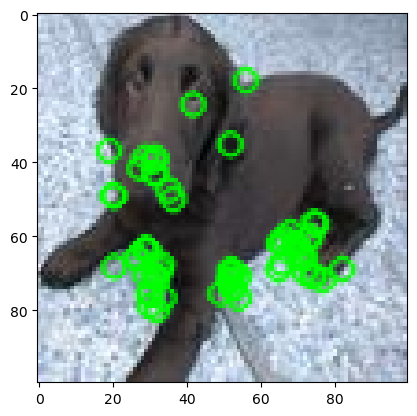

In [161]:
orb = cv2.ORB_create(edgeThreshold=17,
patchSize=30, nlevels=8, fastThreshold=20,
scaleFactor=1.2, WTA_K=2,scoreType=cv2.ORB_HARRIS_SCORE,
firstLevel=0, nfeatures=100)
kp = orb.detect(cv2.imread(images[5]),None)
img2 = cv2.drawKeypoints(cv2.imread(images[5]), kp, None, color=(0,255,0))
plt.imshow(img2)
print("number of keypoints",len(kp))
print(f"edge threshold value-{17} and patchSize-{30}")

# 2f

In [41]:
dogs_pca={0:'Lhasa',1:'Boston_bull'}

In [42]:
def images_select_pca():
    images_hist=[]
    for i,j in dog_breeds.items():
        for k in dog_images:
            if str(k).split('/')[5] ==j:
                images_hist.append(k)
    return images_hist

In [43]:
images_pca=images_select_pca()

In [44]:
images_pca[0]

'/Users/rohit/Downloads/Cropped/n02098413-Lhasa/n02098413_10144-0.jpg'

In [183]:
def pca():
    histo=[]
    for i in images_pca:
        img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
        hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
        histo.append(hist)
        scaler = StandardScaler()
        histog = scaler.fit_transform(histo)
    pca = PCA(n_components=2)
    histgr = pca.fit_transform(histog)
    return histgr


pca_hist=pca()

pca_hist

array([[ 9.79726107, -8.04512778],
       [ 9.19304266,  0.04813528],
       [ 5.01276903,  1.21748728],
       ...,
       [ 4.73894371,  0.68527182],
       [-0.53165406,  6.95768615],
       [10.45376576, -7.72383768]])

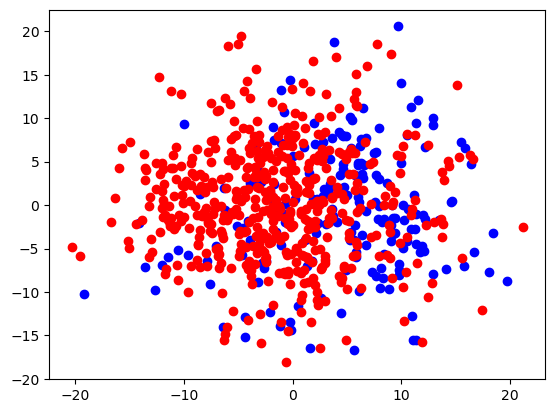

In [188]:
plt.scatter(pca_hist[:190,0],pca_hist[:190,1],color='blue')
plt.scatter(pca_hist[190:,0],pca_hist[190:,1],color='red')
plt.show()

In [ ]:
####Observation: From the above picture both classes cannot be separated#####